In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from signature_detect.loader import Loader
from signature_detect.extractor import Extractor
from signature_detect.cropper import Cropper
from signature_detect.judger import Judger

%load_ext autoreload
%autoreload 2

In [5]:
def show_image(img):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(img)
    ax.set_axis_off()
    plt.tight_layout()
    plt.show()

# Image

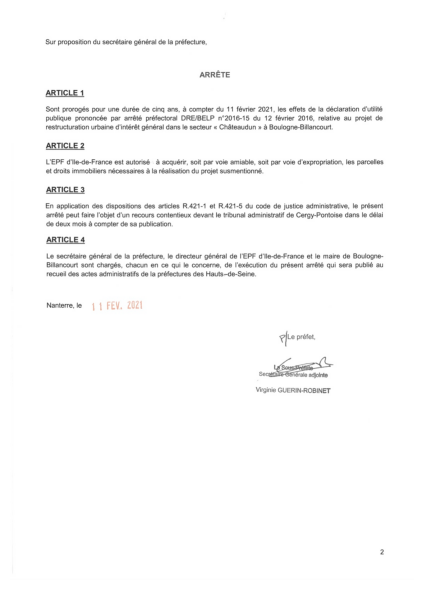

In [6]:
path = './data/input/signed_image.jpeg'
image = cv2.imread('./data/input/signed_image.jpeg')
show_image(image)

## Loader

The loader reads the file and creates a mask. 

The mask is a numpy array. The bright parts are set to 255, the rest is set to 0.

In [7]:
loader = Loader()
print(loader)


Loader
low_threshold = (0, 0, 250)
high_threshold = (255, 255, 255)



[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[  0 255]


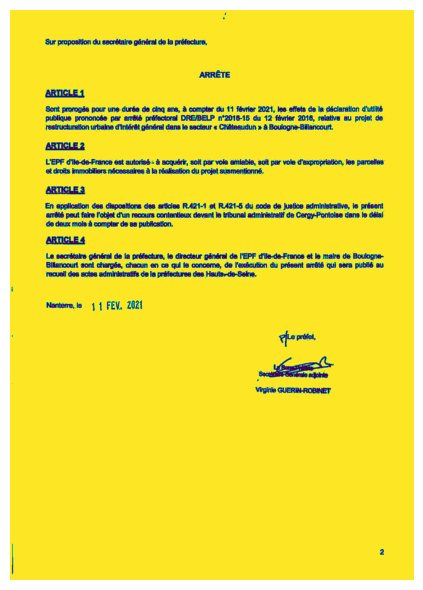

In [8]:
mask = loader.get_masks(path)[0]
print(mask)
print(np.unique(mask))
show_image(mask)
# plt.imsave('./data/output/mask.jpeg', mask)

## Extractor

The extractor 

1. generates the regions from the mask.
2. removes the small and the big region because the signature is neither too big nor too small.

In [9]:
extractor = Extractor(amplfier=15)
print(extractor)


Extractor
outlier_weight = 3
outlier_bias = 100
> small_outlier_size = outlier_weight * average_region_size + outlier_bias
amplfier = 15
> large_outlier_size = amplfier * small_outlier_size
min_area_size = 10 (pixels)
> min_area_size is used to calculate average_region_size.



[  0 255]


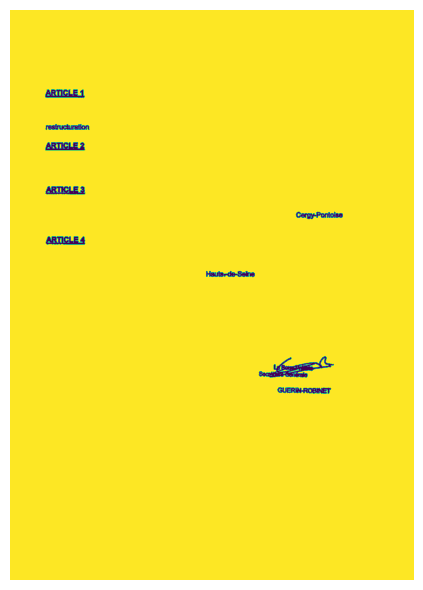

In [10]:
labeled_mask = extractor.extract(mask)
print(np.unique(labeled_mask))
show_image(labeled_mask)
# plt.imsave('./data/output/labeled_mask.jpeg', labeled_mask)

## Cropper

The cropper finds the **contours** of regions in the **labeled masks** and crop them.

In [11]:
cropper = Cropper()
print(cropper)


Cropper
min_region_size = 10000
border_ratio = 0.1



In [12]:
results = cropper.run(labeled_mask)

[  0 255]


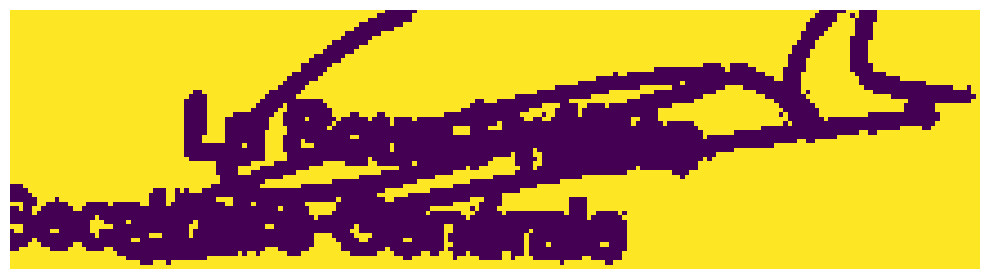

In [13]:
signature = results[0]["cropped_mask"]
print(np.unique(signature))
show_image(signature)
# plt.imsave('./data/output/signature.jpeg', signature)

## Judger

The judger reads the cropped mask and identifies if it's a signature or not.

In [14]:
judger = Judger()
print(judger)


Judger
size_ratio = [1, 4]
pixel_ratio = [0.01, 1]



In [15]:
result = judger.judge(signature)
result

True

# PDF

In [16]:
file_path = './data/input/signed_file.pdf'
loader = Loader()
extractor = Extractor(amplfier=15)
cropper = Cropper(border_ratio=0)
judger = Judger()

In [17]:
masks = loader.get_masks(file_path)
for i in range(len(masks)):
    show_image(masks[i])
    # plt.imsave('./data/output/mask_{}.jpeg'.format(i), masks[i])

DelegateError: FailedToExecuteCommand `"gswin64c.exe" -q -dQUIET -dSAFER -dBATCH -dNOPAUSE -dNOPROMPT -dMaxBitmap=500000000 -dAlignToPixels=0 -dGridFitTT=2 "-sDEVICE=pngalpha" -dTextAlphaBits=4 -dGraphicsAlphaBits=4 "-r200x200" -dPrinted=false  "-sOutputFile=C:/Users/iwano/AppData/Local/Temp/magick-UD7-DEBtUHYeP518WOf25bC7gFpBLrLo%d" "-fC:/Users/iwano/AppData/Local/Temp/magick-gepcVoZJQdApre0u79Oad5nAfuxcNTyP" "-fC:/Users/iwano/AppData/Local/Temp/magick-4_9p1pCgEcVDU4610E61zOc9sv0LcVFc"' (Nie mo�na odnale�� okre�lonego pliku.
) @ error/delegate.c/ExternalDelegateCommand/517

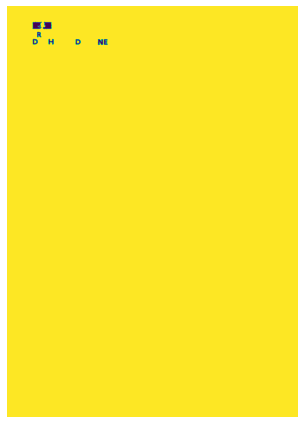

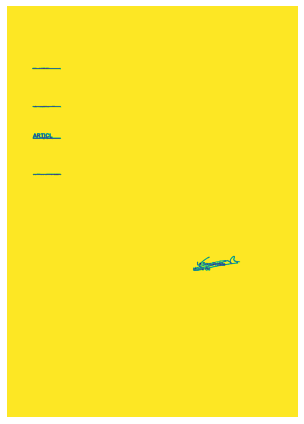

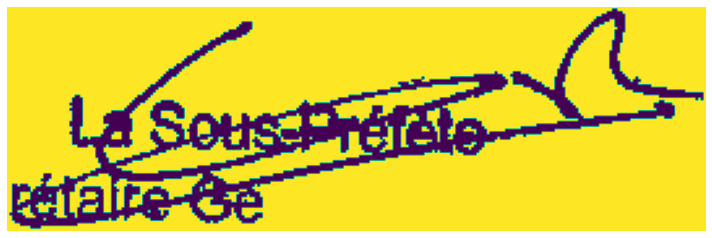

True


In [16]:
is_signed = False
for i in range(len(masks)):
    labeled_mask = extractor.extract(masks[i])
    show_image(labeled_mask)
    # plt.imsave('./data/output/labeled_mask_{}.jpeg'.format(i), labeled_mask)
    results = cropper.run(labeled_mask)
    for result in results.values():
        is_signed = judger.judge(result["cropped_mask"])
        if is_signed:
            show_image(result["cropped_mask"])
            # plt.imsave('./data/output/sign.jpeg'.format(i), cropped_image)
            break
    if is_signed:
        break
print(is_signed)